## Logistic Regression:

### **Business Problem Definition:**
The business problem revolves around **predicting the likelihood of order cancellations** for a product fulfillment company based on historical order data. This prediction helps the company:

- `Proactively address potential cancellations,`
- `Optimize operations, and`
- `Improve customer satisfaction.`

By identifying high-risk orders early, the business `can take preventive actions`, such as offering incentives or expedited shipping, to reduce the likelihood of cancellations.

This is a `binary classification` problem where the target variable is the `Order_Cancelled` column.

The model needs to classify whether an order will be cancelled based on features like the delivery time, order value, region, and other order-related attributes.

---

## Dataset Description:



Explanation of Attributes/Target Variable:

\
Each row represents an `order placed by the customer` while columms represent the varied specifics of that order.

\

- `Days_to_Delivery` (numeric):  
  The number of days it takes for the order to be delivered, generated based on a normal distribution with a mean of 5 days and a standard deviation of 2 days.

- `Num_Items_Ordered` (numeric):  
  The total number of items in the order, represented as an integer between 1 and 20, reflecting the quantity of products ordered.

- `Order_Value` (numeric):  
  The total value of the order in USD. It is generated from a normal distribution centered around $500, with a standard deviation of $100.

- `Discount_Rate` (numeric):  
  The discount rate applied to the order, represented as a value between 0 and 0.5, indicating various discounts offered during sales.

- `Num_Previous_Orders` (numeric):  
  The number of previous orders placed by the customer. It is an integer between 0 and 10.

- `Delivery_Time_Variation` (numeric):  
  The variation between the estimated and actual delivery time, measured in days, with values ranging from 0 to 3 days.

- `Region` (categorical):  
  The geographic region of the customer. Possible values:
  - North America
  - EMEA (Europe, Middle East, Africa)
  - APAC (Asia-Pacific)
  - LATAM (Latin America)

- `Product_Category` (categorical)
  The category of the product ordered. Possible values:
  - Cloud
  - On-premise
  - SaaS (Software as a Service)
  - Hardware

- `Order_Priority` (categorical):  
  The urgency level of the order. Possible values:
  - Low
  - Medium
  - High

- `Payment_Method` (categorical):  
  The method used for payment in the order. Possible values include:
  - Credit Card
  - Bank Transfer
  - PayPal
  - Bitcoin

- `Correlated_Order_Value` (numeric):  
  Represents an alternative estimation of the total order value, calculated by factoring in **historical customer spending behavior** and **product pricing trends**.It incorporates additional business insights such as customer loyalty and purchasing history.


- `Order_Cancelled (Target):` This is the target column indicating whether the order was cancelled or not. Values are "Cancelled" or "Not-Cancelled".

---

### Comprehensive Data Science Project Workflow: From Business Understanding to Model Monitoring:

1. `Business Understanding` (Define project goals and objectives.)

2. `Data Requirement` (Identify necessary data for analysis)

3. `Data Collection` (Data gathering from different sources with varied tools and technologies)

4. `Data Preparation` (EDA/Data Preparation/Data Cleaning/Data Munging)

5. `Data Modeling` ( Clean Data + Algorithms = Model)

6. `Model Evaluation`  (Test Model perf)

7. `Model Tuning`(Optimize model hyperparameters)

8. `Model Deployment`(Deploy model for real-time use)

9. `Monitoring`(Track model performance over time)

---

### EDA/ Data Preparation/Data Cleaning Steps:

1. `Removing Duplicate data`
2. `Missing Value Treatment`
3. `Outlier Treatment`
4. `Categorical to Numerical Conversion`
5. `Numerical to Categorical Conversion`
6. `Feature Scaling`
7. `Feature Transformation`
8. `Feature selection`

---

1. Import Necessary Libraries

In [ ]:
# %pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 14.8 MB/s eta 0:00:00


In [1]:
# Importing all necessary Libaries: Data Science Packages

import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data with pandas

df = pd.read_csv("order_mgmt_binary_classification.csv")

In [3]:
# Reading first 5 Rows of the data

df.head()

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          5.993428                  6   716.505607       0.098621   
1          4.723471                 11   619.054859       0.106769   
2          6.295377                  3   521.257403       0.338047   
3          8.046060                  8   602.698626       0.202501   
4          4.531693                  3   610.590042       0.465772   

   Num_Previous_Orders  Delivery_Time_Variation Region Product_Category  \
0                    5                 1.129165   EMEA       On-premise   
1                    7                 0.889863   APAC            Cloud   
2                    0                 2.668340  LATAM       On-premise   
3                    4                 2.998095  LATAM       On-premise   
4                    2                 2.011061   APAC         Hardware   

  Order_Priority Payment_Method  Correlated_Order_Value Order_Cancelled  
0            Low        Bitcoin              677.114236   Not-Cancelled  
1         Medium        Bitcoin              591.127949   Not-Cancelled  
2         Medium  Bank Transfer              502.195055   Not-Cancelled  
3           High         PayPal              566.850797   Not-Cancelled  
4           High  Bank Transfer              581.693494   Not-Cancelled

In [4]:
# Reading last 5 Rows of the data

df.tail()

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
3995          5.471104                 17   432.846658       0.041176   
3996          0.689275                 10   321.994624       0.180283   
3997          5.855895                  6   416.044214       0.249029   
3998          5.337336                 11   489.287493       0.215548   
3999          4.185158                 14   559.004143       0.140213   

      Num_Previous_Orders  Delivery_Time_Variation Region Product_Category  \
3995                    6                 0.124429  LATAM       On-premise   
3996                    7                 1.824347   EMEA            Cloud   
3997                    2                 0.954662   EMEA       On-premise   
3998                    5                 0.560760  LATAM             SaaS   
3999                    0                 2.450295   EMEA            Cloud   

     Order_Priority Payment_Method  Correlated_Order_Value Order_Cancelled  
3995         Medium        Bitcoin              410.113830       Cancelled  
3996            Low    Credit Card              303.608794       Cancelled  
3997         Medium         PayPal              402.431913       Cancelled  
3998            Low         PayPal              466.154060       Cancelled  
3999         Medium        Bitcoin              532.405465       Cancelled

In [5]:
# Checking the shape of the data

df.shape

(4000, 12)

In [6]:
# Checking the shape of the data

df.shape[0]

4000

In [7]:
# Checking the shape of the data

df.shape[1]

12

In [8]:
#Reading the name of the columns

df.columns

Index(['Days_to_Delivery', 'Num_Items_Ordered', 'Order_Value', 'Discount_Rate',
       'Num_Previous_Orders', 'Delivery_Time_Variation', 'Region',
       'Product_Category', 'Order_Priority', 'Payment_Method',
       'Correlated_Order_Value', 'Order_Cancelled'],
      dtype='object')

In [10]:
# View datatypes of allcolumns of dataset

df.dtypes

Days_to_Delivery           float64
Num_Items_Ordered            int64
Order_Value                float64
Discount_Rate              float64
Num_Previous_Orders          int64
Delivery_Time_Variation    float64
Region                      object
Product_Category            object
Order_Priority              object
Payment_Method              object
Correlated_Order_Value     float64
Order_Cancelled             object
dtype: object

In [11]:
# View info of Columns of the dataset such as number of entries, name of columns and data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Days_to_Delivery         4000 non-null   float64
 1   Num_Items_Ordered        4000 non-null   int64  
 2   Order_Value              4000 non-null   float64
 3   Discount_Rate            4000 non-null   float64
 4   Num_Previous_Orders      4000 non-null   int64  
 5   Delivery_Time_Variation  4000 non-null   float64
 6   Region                   4000 non-null   object 
 7   Product_Category         4000 non-null   object 
 8   Order_Priority           4000 non-null   object 
 9   Payment_Method           4000 non-null   object 
 10  Correlated_Order_Value   4000 non-null   float64
 11  Order_Cancelled          4000 non-null   object 
dtypes: float64(5), int64(2), object(5)
memory usage: 375.1+ KB


In [12]:
# Creating the Data Dictionary with first column being datatype.

Data_dict = pd.DataFrame(df.dtypes)
Data_dict

0
Days_to_Delivery         float64
Num_Items_Ordered          int64
Order_Value              float64
Discount_Rate            float64
Num_Previous_Orders        int64
Delivery_Time_Variation  float64
Region                    object
Product_Category          object
Order_Priority            object
Payment_Method            object
Correlated_Order_Value   float64
Order_Cancelled           object

In [13]:
# Identifying unique values . For this we used nunique() which returns unique elements in the object.

Data_dict['UniqueVal'] = df.nunique()
Data_dict

0  UniqueVal
Days_to_Delivery         float64       4000
Num_Items_Ordered          int64         19
Order_Value              float64       4000
Discount_Rate            float64       4000
Num_Previous_Orders        int64         10
Delivery_Time_Variation  float64       4000
Region                    object          4
Product_Category          object          4
Order_Priority            object          3
Payment_Method            object          4
Correlated_Order_Value   float64       4000
Order_Cancelled           object          2

# **Discriptive Statistics**

In [14]:
# view the descriptive statistics of the dataset

df.describe()

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
count       4000.000000        4000.000000  4000.000000    4000.000000   
mean           5.042184          10.116250   501.181391       0.245425   
std            1.969642           5.401438   100.872740       0.142842   
min           -1.482535           1.000000   166.510729       0.000063   
25%            3.707940           5.000000   433.520531       0.122622   
50%            5.025536          10.000000   501.165442       0.243107   
75%            6.309499          15.000000   569.059613       0.366216   
max           13.295790          19.000000   860.283214       0.499804   

       Num_Previous_Orders  Delivery_Time_Variation  Correlated_Order_Value  
count          4000.000000              4000.000000             4000.000000  
mean              4.534500                 1.497161              476.032221  
std               2.877826                 0.869979               95.924241  
min               0.000000                 0.003067              150.331593  
25%               2.000000                 0.757221              411.936377  
50%               5.000000                 1.509437              475.467864  
75%               7.000000                 2.238121              540.587883  
max               9.000000                 2.999922              819.532127

In [19]:
# Get discriptive statistics on "number" datatypes

df.describe(include = ['number'])

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
count       4000.000000        4000.000000  4000.000000    4000.000000   
mean           5.042184          10.116250   501.181391       0.245425   
std            1.969642           5.401438   100.872740       0.142842   
min           -1.482535           1.000000   166.510729       0.000063   
25%            3.707940           5.000000   433.520531       0.122622   
50%            5.025536          10.000000   501.165442       0.243107   
75%            6.309499          15.000000   569.059613       0.366216   
max           13.295790          19.000000   860.283214       0.499804   

       Num_Previous_Orders  Delivery_Time_Variation  Correlated_Order_Value  
count          4000.000000              4000.000000             4000.000000  
mean              4.534500                 1.497161              476.032221  
std               2.877826                 0.869979               95.924241  
min               0.000000                 0.003067              150.331593  
25%               2.000000                 0.757221              411.936377  
50%               5.000000                 1.509437              475.467864  
75%               7.000000                 2.238121              540.587883  
max               9.000000                 2.999922              819.532127

In [20]:
# Get discriptive statistics on "objects" datatypes

df.describe(include = ['object'])

Region Product_Category Order_Priority Payment_Method Order_Cancelled
count    4000             4000           4000           4000            4000
unique      4                4              3              4               2
top      EMEA             SaaS            Low  Bank Transfer   Not-Cancelled
freq     1022             1046           1356           1029            2614

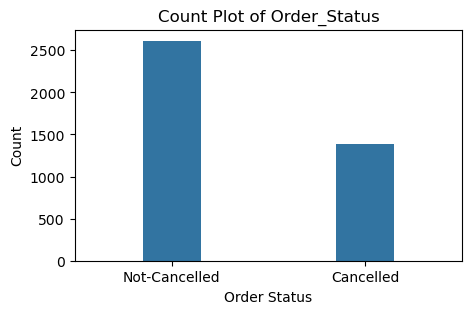

In [21]:
# Drawing a count plot for the target column 'Order_Status'
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
sns.countplot(x='Order_Cancelled', data=df, width=0.3)  # Default width is 0.8, 0.3 is 70% shorter
plt.title('Count Plot of Order_Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.show()


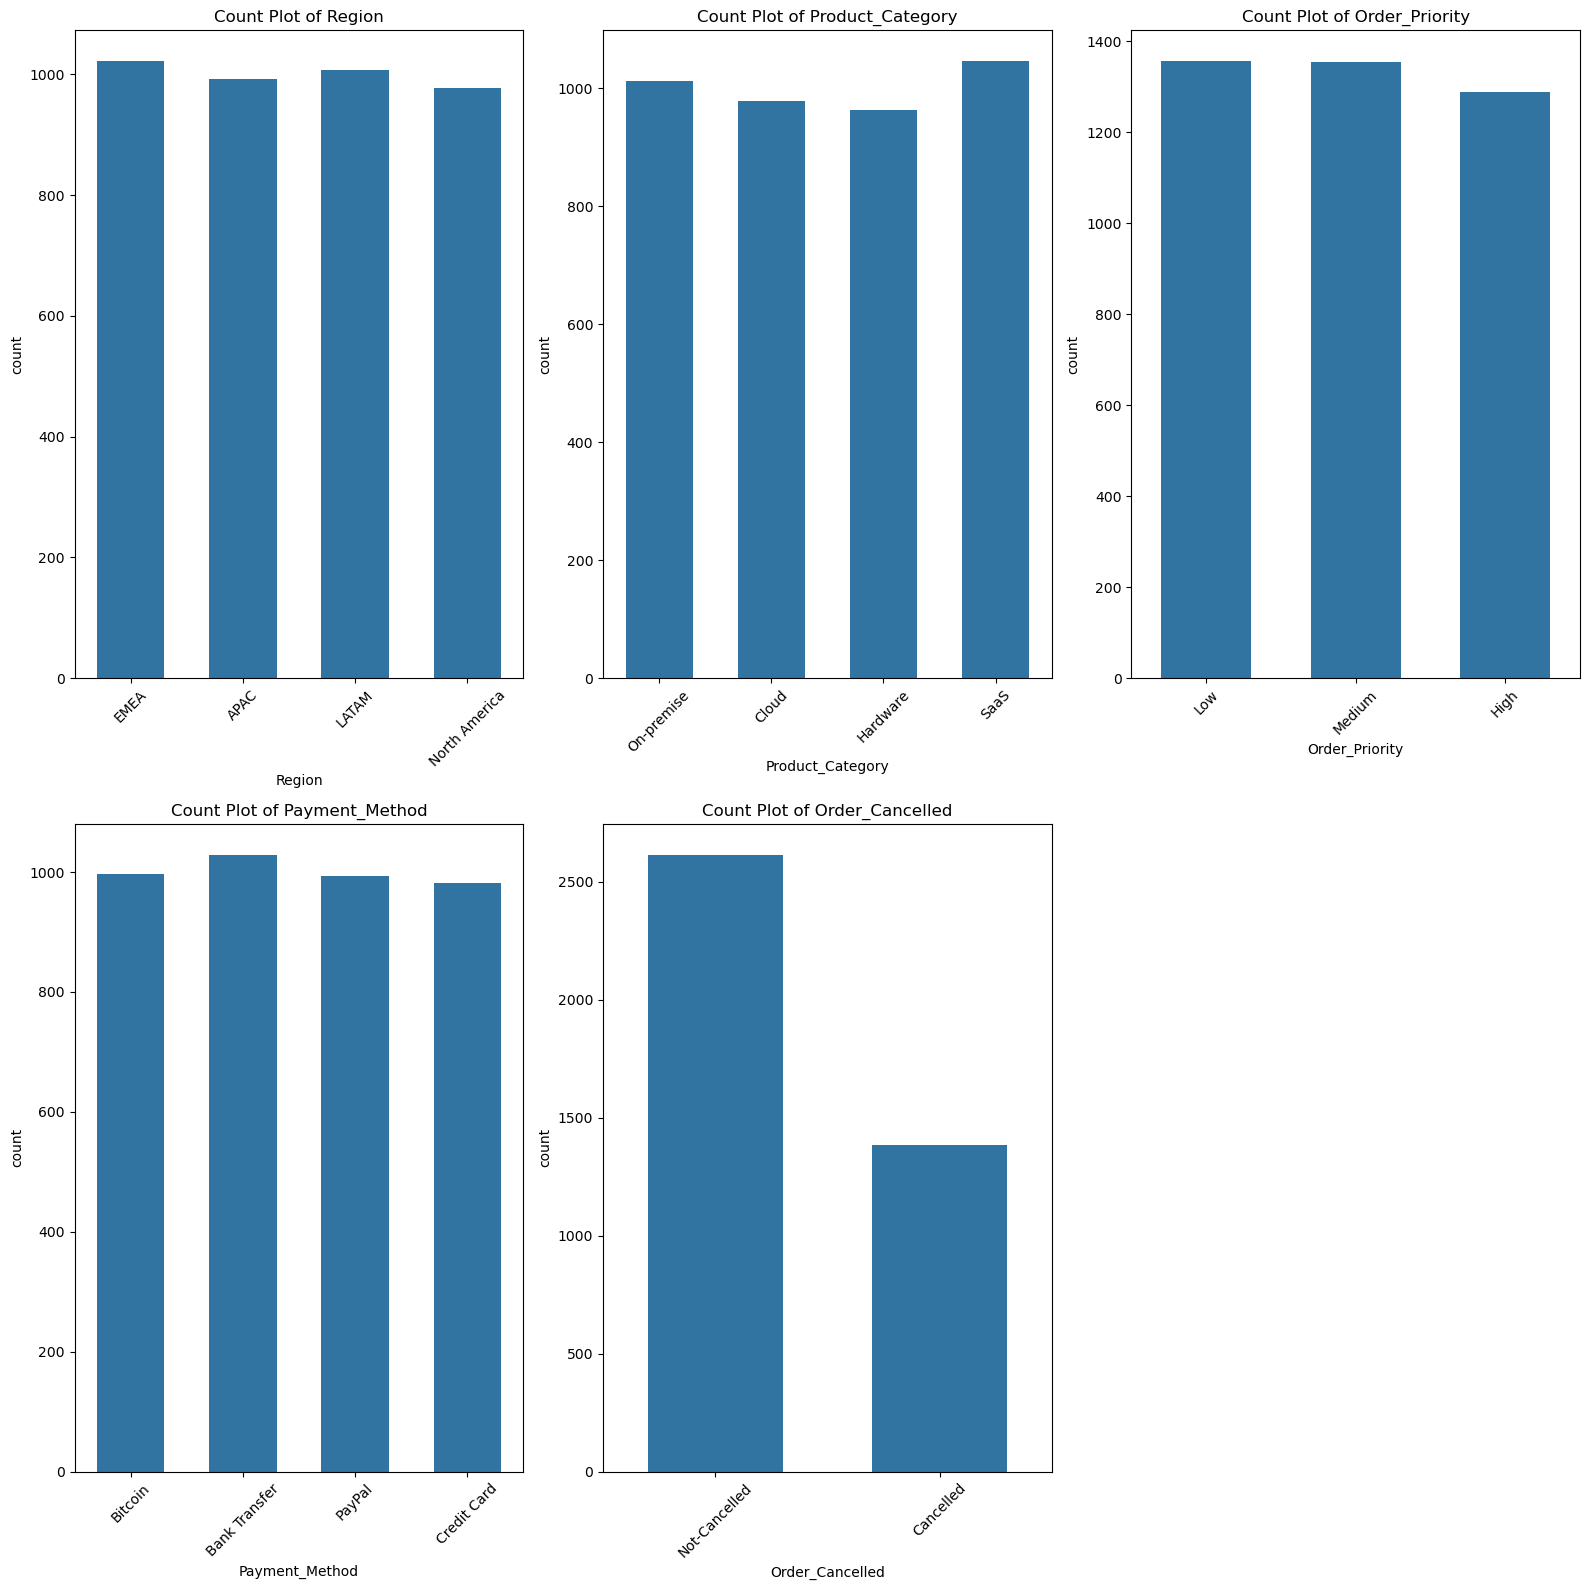

In [23]:
# Redefining the cleaned categorical columns for plotting
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Calculate the number of rows needed for subplots
num_rows = int(np.ceil(len(categorical_columns) / 3))  # Calculate rows needed

# Step 2: Draw count plots for each categorical column
plt.figure(figsize=(16, 8 * num_rows))  # Adjust figure height based on rows
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(num_rows, 3, i)  # Use calculated num_rows
    sns.countplot(x=df[column], width=0.6)  # Reduce width by 40% (default is 0.8)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [24]:
# Reading first 5 Rows of the data

df.head()

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          5.993428                  6   716.505607       0.098621   
1          4.723471                 11   619.054859       0.106769   
2          6.295377                  3   521.257403       0.338047   
3          8.046060                  8   602.698626       0.202501   
4          4.531693                  3   610.590042       0.465772   

   Num_Previous_Orders  Delivery_Time_Variation Region Product_Category  \
0                    5                 1.129165   EMEA       On-premise   
1                    7                 0.889863   APAC            Cloud   
2                    0                 2.668340  LATAM       On-premise   
3                    4                 2.998095  LATAM       On-premise   
4                    2                 2.011061   APAC         Hardware   

  Order_Priority Payment_Method  Correlated_Order_Value Order_Cancelled  
0            Low        Bitcoin              677.114236   Not-Cancelled  
1         Medium        Bitcoin              591.127949   Not-Cancelled  
2         Medium  Bank Transfer              502.195055   Not-Cancelled  
3           High         PayPal              566.850797   Not-Cancelled  
4           High  Bank Transfer              581.693494   Not-Cancelled

# **Data Cleaning**

In [25]:
df.duplicated().sum()

0

In [26]:
# Checking the null values columns wise

df.isnull().sum()

Days_to_Delivery           0
Num_Items_Ordered          0
Order_Value                0
Discount_Rate              0
Num_Previous_Orders        0
Delivery_Time_Variation    0
Region                     0
Product_Category           0
Order_Priority             0
Payment_Method             0
Correlated_Order_Value     0
Order_Cancelled            0
dtype: int64

## **Categorical attributes: Dummy Encoding:**

In [103]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder

df_encoded = df.copy()
label_encoder = LabelEncoder()

#df_encoded['Region'] = label_encoder.fit_transform(df_encoded['Region'])
#df_encoded['Product_Category'] = label_encoder.fit_transform(df_encoded['Product_Category'])
#df_encoded['Order_Priority'] = label_encoder.fit_transform(df_encoded['Order_Priority'])
#df_encoded['Payment_Method'] = label_encoder.fit_transform(df_encoded['Payment_Method'])
df_encoded['Order_Cancelled'] = label_encoder.fit_transform(df_encoded['Order_Cancelled'])

ohe = OneHotEncoder()
df_encoded[ohe.get_feature_names_out()] = ohe.fit_transform(df_encoded[['Region']]).toarray()
df_encoded[ohe.get_feature_names_out()] = ohe.fit_transform(df_encoded[['Product_Category']]).toarray()
df_encoded[ohe.get_feature_names_out()] = ohe.fit_transform(df_encoded[['Order_Priority']]).toarray()
df_encoded[ohe.get_feature_names_out()] = ohe.fit_transform(df_encoded[['Payment_Method']]).toarray()
#df_encoded[ohe.get_feature_names_out()] = ohe.fit_transform(df_encoded[['Order_Cancelled']]).toarray()

In [104]:
df_encoded.columns

Index(['Days_to_Delivery', 'Num_Items_Ordered', 'Order_Value', 'Discount_Rate',
       'Num_Previous_Orders', 'Delivery_Time_Variation', 'Region',
       'Product_Category', 'Order_Priority', 'Payment_Method',
       'Correlated_Order_Value', 'Order_Cancelled', 'Region_APAC',
       'Region_EMEA', 'Region_LATAM', 'Region_North America',
       'Product_Category_Cloud', 'Product_Category_Hardware',
       'Product_Category_On-premise', 'Product_Category_SaaS',
       'Order_Priority_High', 'Order_Priority_Low', 'Order_Priority_Medium',
       'Payment_Method_Bank Transfer', 'Payment_Method_Bitcoin',
       'Payment_Method_Credit Card', 'Payment_Method_PayPal'],
      dtype='object')

In [105]:
df_encoded.head()

Days_to_Delivery  Num_Items_Ordered  Order_Value  Discount_Rate  \
0          5.993428                  6   716.505607       0.098621   
1          4.723471                 11   619.054859       0.106769   
2          6.295377                  3   521.257403       0.338047   
3          8.046060                  8   602.698626       0.202501   
4          4.531693                  3   610.590042       0.465772   

   Num_Previous_Orders  Delivery_Time_Variation Region Product_Category  \
0                    5                 1.129165   EMEA       On-premise   
1                    7                 0.889863   APAC            Cloud   
2                    0                 2.668340  LATAM       On-premise   
3                    4                 2.998095  LATAM       On-premise   
4                    2                 2.011061   APAC         Hardware   

  Order_Priority Payment_Method  ...  Product_Category_Hardware  \
0            Low        Bitcoin  ...                        0.0   
1         Medium        Bitcoin  ...                        0.0   
2         Medium  Bank Transfer  ...                        0.0   
3           High         PayPal  ...                        0.0   
4           High  Bank Transfer  ...                        1.0   

   Product_Category_On-premise  Product_Category_SaaS  Order_Priority_High  \
0                          1.0                    0.0                  0.0   
1                          0.0                    0.0                  0.0   
2                          1.0                    0.0                  0.0   
3                          1.0                    0.0                  1.0   
4                          0.0                    0.0                  1.0   

   Order_Priority_Low  Order_Priority_Medium  Payment_Method_Bank Transfer  \
0                 1.0                    0.0                           0.0   
1                 0.0                    1.0                           0.0   
2                 0.0                    1.0                           1.0   
3                 0.0                    0.0                           0.0   
4                 0.0                    0.0                           1.0   

   Payment_Method_Bitcoin  Payment_Method_Credit Card  Payment_Method_PayPal  
0                     1.0                         0.0                    0.0  
1                     1.0                         0.0                    0.0  
2                     0.0                         0.0                    0.0  
3                     0.0                         0.0                    1.0  
4                     0.0                         0.0                    0.0  

[5 rows x 27 columns]

In [106]:
# Visulaizing the Pairplot of complete dataset

#sns.pairplot(df_encoded)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [108]:
# Separate features and target
X = df_encoded.drop(['Order_Cancelled', 'Correlated_Order_Value', 'Order_Value'], axis=1)
y = df_encoded['Order_Cancelled']

In [109]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
# Arrange VIF values in descending order
vif_data = vif_data.sort_values(by="VIF", ascending=False)


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [101]:
vif_data

feature
0               Days_to_Delivery
1              Num_Items_Ordered
2                  Discount_Rate
3            Num_Previous_Orders
4        Delivery_Time_Variation
5                         Region
6               Product_Category
7                 Order_Priority
8                 Payment_Method
9                    Region_APAC
10                   Region_EMEA
11                  Region_LATAM
12          Region_North America
13        Product_Category_Cloud
14     Product_Category_Hardware
15   Product_Category_On-premise
16         Product_Category_SaaS
17           Order_Priority_High
18            Order_Priority_Low
19         Order_Priority_Medium
20  Payment_Method_Bank Transfer
21        Payment_Method_Bitcoin
22    Payment_Method_Credit Card
23         Payment_Method_PayPal
24             Order_Cancelled_0
25             Order_Cancelled_1

In [92]:
# Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [93]:
# Standardize numeric features
#scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: 'APAC'

In [70]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:, 1]

In [71]:
# ROC and AUC for Logistic Regression
roc_auc_log = roc_auc_score(y_test, y_prob_log)
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)

In [72]:
print(roc_auc_log)

0.5309127199250899


In [73]:
# Confusion Matrix and Classification Report for Logistic Regression
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

In [74]:
print(conf_matrix_log)

#[ TN FP ]
#[ FN TP ​]

[[  0 412]
 [  0 788]]


In [75]:
print(class_report_log)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       412
           1       0.66      1.00      0.79       788

    accuracy                           0.66      1200
   macro avg       0.33      0.50      0.40      1200
weighted avg       0.43      0.66      0.52      1200



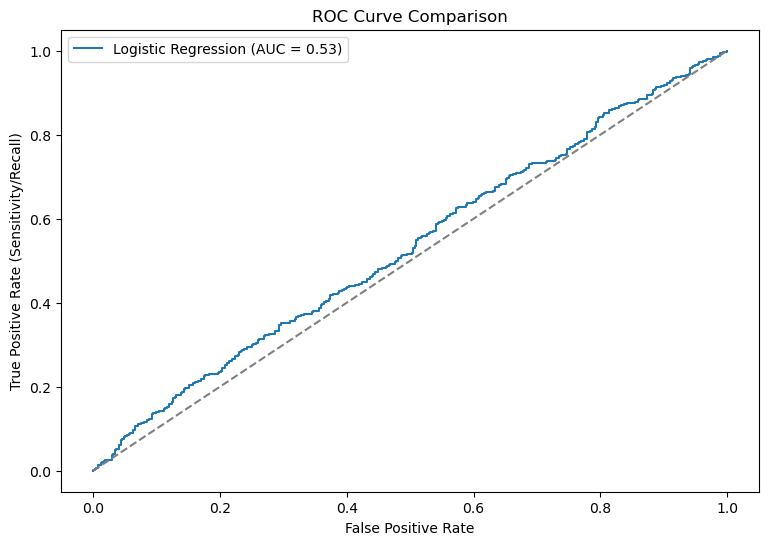

In [76]:
# Plot ROC Curves
plt.figure(figsize=(9, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {roc_auc_log:.2f})')
#plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

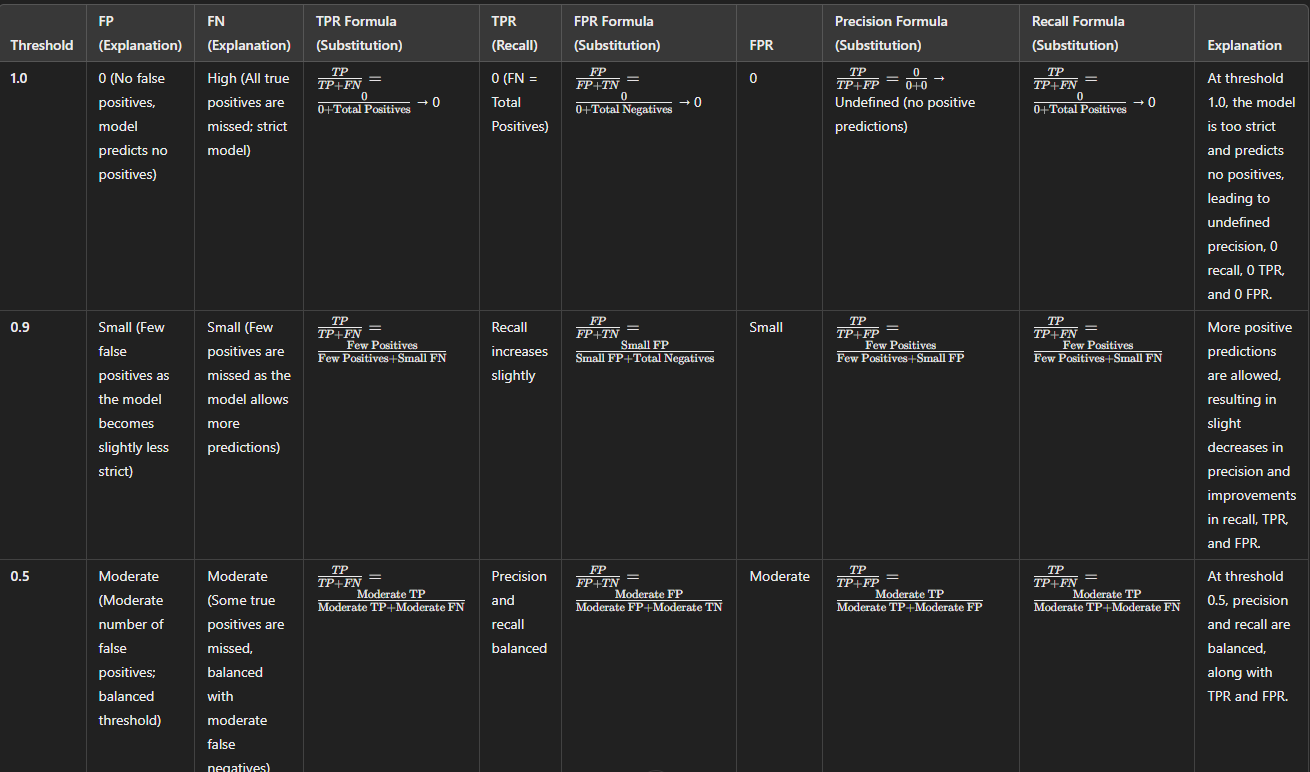

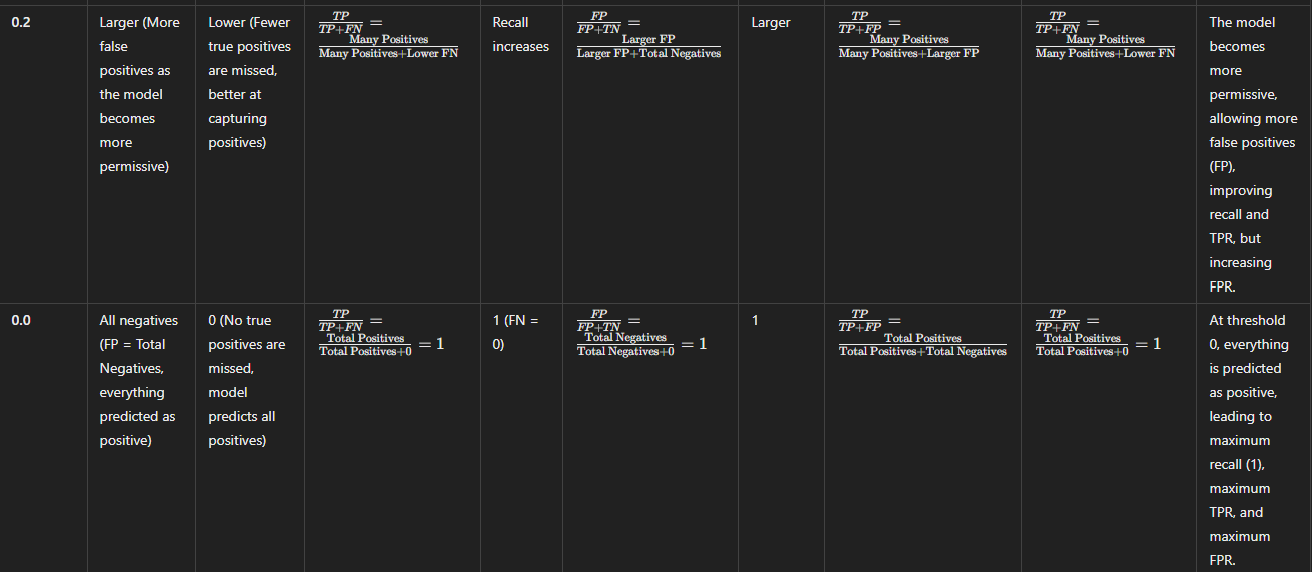

#### `In-Class Activity - 1:` Duration: 15 minutes
- Now instead of using `Standard scaler` for feature scaling , apply Min-Max normalization as a feature scaling and check the effect in performance of model in test.




In [49]:
# Standardize numeric features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_1 = scaler.fit_transform(X_train)
X_test_scaled_1 = scaler.transform(X_test)

In [50]:
# Logistic Regression
log_reg_1 = LogisticRegression()
log_reg_1.fit(X_train_scaled_1, y_train)
y_pred_log_1 = log_reg_1.predict(X_test_scaled_1)
y_prob_log_1 = log_reg_1.predict_proba(X_test_scaled_1)[:, 1]

In [ ]:
# ROC and AUC for Logistic Regression
roc_auc_log_1 = roc_auc_score(y_test, y_prob_log_1)
fpr_log_1, tpr_log_1, _ = roc_curve(y_test, y_prob_log_1)